# In this project we will be working on the dataset for Restaurant Food Cost Prediction Project to analyze the data and create a model to predict the Cost of food. 
The  focus will be on transforming the data to be able to work with it and create a working model.

In [1]:
#Importing the Libraries

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
#read the csv files

df=pd.read_csv("Data_Train.csv")
test=pd.read_csv("Data_Test.csv")

Lets check the details on data to get some insights.

In [3]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
TITLE            12690 non-null object
RESTAURANT_ID    12690 non-null int64
CUISINES         12690 non-null object
TIME             12690 non-null object
CITY             12578 non-null object
LOCALITY         12592 non-null object
RATING           12688 non-null object
VOTES            11486 non-null object
COST             12690 non-null int64
dtypes: int64(2), object(7)
memory usage: 892.3+ KB


The info clearly shows there are missing values. Lets find the total of missing values in each column.

In [5]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [6]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [7]:
df.shape

(12690, 9)

As wee can see there are 7 object data type columns and 2 integer. We need to convert this data. 

Lets combine the test and train data to be used at a later stage for label encoding to avoid errors when working on model.

While looking at the data, we will also be working on data cleaning for both train and test dataset as applicable and required.



In [8]:
data = [df[['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY','RATING', 'VOTES']], test]

data = pd.concat(data)


Lets work on the TITLE column to find the maximum number of titles a restaurant has and then split the TITLE column into maximum number of titles a restaurant has.

In [9]:

titles = list(data['TITLE'])

# Finding Maximum number of titles mentioned in a single cell
maxim = 1
for i in titles :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum Titles in a Cell : ", maxim)



Maximum Titles in a Cell :  2


There are maximum 2 titles for a restaurant

Lets find the unique title names

In [10]:
all_titles = []

for i in titles :
    if len(i.split(',')) == 1:
         all_titles.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_titles.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Titles : ", len(pd.Series(all_titles).unique()))
print("\n\nUnique Titles:\n", pd.Series(all_titles).unique())

all_titles = list(pd.Series(all_titles).unique())



Number of Unique Titles :  25


Unique Titles:
 ['CASUAL DINING' 'BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'BEVERAGE SHOP' 'IRANI CAFE' 'BAKERY' 'NONE' 'PUB'
 'FINE DINING' 'SWEET SHOP' 'LOUNGE' 'FOOD COURT' 'FOOD TRUCK' 'MESS'
 'KIOSK' 'CLUB' 'CONFECTIONERY' 'DHABA' 'MEAT SHOP' 'COCKTAIL BAR'
 'PAAN SHOP' 'BHOJANALYA']


There are 25 unique titles for the restaurants in the dataset. 

Since Maximum number of titles in a cell is 2 will will split title in to 2 columns.



In [11]:
titles = list(df['TITLE'])

T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

# appending NONE to Unique titles list
all_titles.append('NONE')

Now let's analyze the Cuisines column.

In [12]:
cuisines = list(data['CUISINES'])

maxim = 1
for i in cuisines :
    if len(i.split(',')) > maxim:
         maxim = len(i.split(','))
         
print("\n\nMaximum cuisines in a Cell : ", maxim) 



Maximum cuisines in a Cell :  8


In [13]:
all_cuisines = []

for i in cuisines :
    if len(i.split(',')) == 1:
         all_cuisines.append(i.split(',')[0].strip().upper())
    else :
        for it in range(len(i.split(','))):
            all_cuisines.append(i.split(',')[it].strip().upper())

print("\n\nNumber of Unique Cuisines : ", len(pd.Series(all_cuisines).unique()))
print("\n\nUnique Cuisines:\n", pd.Series(all_cuisines).unique())

all_cuisines = list(pd.Series(all_cuisines).unique())



Number of Unique Cuisines :  130


Unique Cuisines:
 ['MALWANI' 'GOAN' 'NORTH INDIAN' 'ASIAN' 'MODERN INDIAN' 'JAPANESE'
 'CHINESE' 'BIRYANI' 'HYDERABADI' 'TIBETAN' 'DESSERTS' 'SEAFOOD' 'CAFE'
 'PIZZA' 'BURGER' 'BAR FOOD' 'SOUTH INDIAN' 'FAST FOOD' 'BEVERAGES'
 'ARABIAN' 'MUGHLAI' 'MAHARASHTRIAN' 'PARSI' 'THAI' 'BAKERY' 'MOMOS'
 'CONTINENTAL' 'EUROPEAN' 'ROLLS' 'ANDHRA' 'ITALIAN' 'BBQ' 'FINGER FOOD'
 'TEA' 'AMERICAN' 'HEALTHY FOOD' 'COFFEE' 'INDONESIAN' 'KOREAN' 'NEPALESE'
 'ICE CREAM' 'MEXICAN' 'KERALA' 'INDIAN' 'MITHAI' 'STREET FOOD'
 'MALAYSIAN' 'VIETNAMESE' 'IRANIAN' 'KEBAB' 'JUICES' 'SANDWICH'
 'MEDITERRANEAN' 'SALAD' 'GUJARATI' 'RAJASTHANI' 'TEX-MEX' 'ROAST CHICKEN'
 'BURMESE' 'CHETTINAD' 'NORTH EASTERN' 'LEBANESE' 'COFFEE AND TEA' 'GRILL'
 '' 'BIHARI' 'BENGALI' 'LUCKNOWI' 'AWADHI' 'STEAK' 'FRENCH' 'PORTUGUESE'
 'WRAPS' 'SRI LANKAN' 'ORIYA' 'ETHIOPIAN' 'KONKAN' 'SUSHI' 'SPANISH'
 'RUSSIAN' 'MANGALOREAN' 'TURKISH' 'BUBBLE TEA' 'AFGHAN' 'NAGA'
 'SINGAPOREAN' 'GERMAN' 'MIDDLE EAST

There are 130 unique cuisines with a maximum of 8 cuisines available in a restaurant.

Since Maximum number of cuisines in a cell is 8 will will split cuisine in to 8 columns.



In [14]:
cuisines = list(df['CUISINES'])
   
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
            try :
                C1.append(i.split(',')[0].strip().upper())
            except :
                C1.append('NONE')
            try :
                C2.append(i.split(',')[1].strip().upper())
            except :
                C2.append('NONE')
            try :
                C3.append(i.split(',')[2].strip().upper())
            except :
                C3.append('NONE')
            try :
                C4.append(i.split(',')[3].strip().upper())
            except :
                C4.append('NONE')
            try :
                C5.append(i.split(',')[4].strip().upper())
            except :
                C5.append('NONE')
            try :
                C6.append(i.split(',')[5].strip().upper())
            except :
                C6.append('NONE')
            try :
                C7.append(i.split(',')[6].strip().upper())
            except :
                C7.append('NONE')
            try :
                C8.append(i.split(',')[7].strip().upper())
            except :
                C8.append('NONE')

# appending NONE to Unique cuisines list
all_cuisines.append('NONE')


Now lets analyze the city column.

As seen already, there are null values in the City column. Lets add not available as a value where we do not have any data in the city column and get the unique number of cities in the dataset.

In [15]:
all_cities = list(data['CITY'])

for i in range(len(all_cities)):
    if type(all_cities[i]) == float:
        all_cities[i] = 'NOT AVAILABLE'
    all_cities[i] = all_cities[i].strip().upper()
        
print("\n\nNumber of Unique cities (Including NOT AVAILABLE): ", len(pd.Series(all_cities).unique()))
print("\n\nUnique Cities:\n", pd.Series(all_cities).unique())
 
all_cities = list(pd.Series(all_cities).unique())




Number of Unique cities (Including NOT AVAILABLE):  445


Unique Cities:
 ['THANE' 'CHENNAI' 'MUMBAI' 'BANGALORE' 'GURGAON' 'HYDERABAD' 'KOCHI'
 'THANE WEST' 'ANDHERI LOKHANDWALA' 'NEW DELHI' 'ANDHERI WEST'
 'MALAD EAST' '682036' 'BANGALOR' 'NAVI MUMBAI' 'BANDRA WEST' 'DELHI'
 'NOIDA' 'BANGALORE-560066' 'SECUNDERABAD' 'NOT AVAILABLE' 'INDIA'
 'MADHURANAGAR' 'CHENNAI TEYNAMPET' 'FARIDABAD' 'CHEMBUR.' 'MAHARASHTRA'
 'OPP GURUDWARA SHAKURPUR' 'TELAGANA LAND LINE:040-48507016' 'GHAZIABAD'
 'KARNATAKA' 'KERALA' 'EDAPPALLY' 'KADAVANTHRA' 'ERNAKULAM CIRCLE KOCHI'
 'BENGALORE' 'NEAR RELIANCE FRESH' 'KILPAUK' 'BENGALURU' 'KOTHAGUDA'
 'GOREGAON WEST' 'BANGLORE' 'TAMIL NADU' 'KAKKANAD' 'KOCHI ELAMKULAM'
 'OUTER RING ROAD' 'MULUND EAST'
 'SECUNDERABAD MAIN ROAD NEAR SIGNAL NMREC COLLEGE' 'TELANGANA'
 'PONNURUNI KOCHI' 'GACHIBOWLI' 'SEMMANCHERI'
 '5TH MAIN TEACHERS COLONY KORAMANGALA BLOCK 1 BANGALORE 560034'
 'MUMBAI MAHIM' 'POWAI (NEXT TO POWAI PLAZA)' 'DOMBIVALI EAST'
 'KOCHI VYTTILA' 'KANDIVA

Now lets clean the city column and create a copy of the column to be used in creating a clean version of the training data set.

In [16]:
cities = list(df['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

Now lets analyze the Locality column to find unique localities type. Also as we have already seen there are null values in the locality column, lets add the value Not available to the empty cells.

In [17]:
all_localities = list(data['LOCALITY'])

for i in range(len(all_localities)):
    if type(all_localities[i]) == float:
        all_localities[i] = 'NOT AVAILABLE'
    all_localities[i] = all_localities[i].strip().upper()
        
print("\n\nNumber of Unique Localities (Including NOT AVAILABLE) : ", len(pd.Series(all_localities).unique()))
print("\n\nUnique Localities:\n", pd.Series(all_localities).unique())

all_localities = list(pd.Series(all_localities).unique())



Number of Unique Localities (Including NOT AVAILABLE) :  1611


Unique Localities:
 ['DOMBIVALI EAST' 'RAMAPURAM' 'SALIGRAMAM' ... 'OFF CARTER ROAD'
 'SRM BACK GATE' 'PERRY CROSS ROAD']


Now lets clean the Locality column and create a copy of the column to be used in creating a clean version of the training data set.

In [18]:
localities = list(df['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper() 

Now lets work on the Rating column. We need to change the datatype of this column from Object to Float.

In [19]:
rates = list(df['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

Now lets work on the VOTES column. This column has numerical value with data, we need to separate the numerical value from text.

In [20]:
votes = list(df['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass 

Lets create a Train Dataset with all the modified and clean columns.

In [21]:
Train_Data = {}

Train_Data['TITLE1'] = T1
Train_Data['TITLE2'] = T2
Train_Data['RESTAURANT_ID'] = df["RESTAURANT_ID"]
Train_Data['CUISINE1'] = C1
Train_Data['CUISINE2'] = C2
Train_Data['CUISINE3'] = C3
Train_Data['CUISINE4'] = C4
Train_Data['CUISINE5'] = C5
Train_Data['CUISINE6'] = C6
Train_Data['CUISINE7'] = C7
Train_Data['CUISINE8'] = C8
Train_Data['CITY'] = cities
Train_Data['LOCALITY'] = localities
Train_Data['RATING'] = rates
Train_Data['VOTES'] = votes
Train_Data['COST'] = df["COST"]

Train_Data = pd.DataFrame(Train_Data)

In [22]:
Train_Data.head()

,CITY,COST,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,LOCALITY,RATING,RESTAURANT_ID,TITLE1,TITLE2,VOTES
0,THANE,1200,MALWANI,GOAN,NORTH INDIAN,NONE,NONE,NONE,NONE,NONE,DOMBIVALI EAST,3.6,9438,CASUAL DINING,NONE,49.0
1,CHENNAI,1500,ASIAN,MODERN INDIAN,JAPANESE,NONE,NONE,NONE,NONE,NONE,RAMAPURAM,4.2,13198,CASUAL DINING,BAR,30.0
2,CHENNAI,800,NORTH INDIAN,CHINESE,BIRYANI,HYDERABADI,NONE,NONE,NONE,NONE,SALIGRAMAM,3.8,10915,CASUAL DINING,NONE,221.0
3,MUMBAI,800,TIBETAN,CHINESE,NONE,NONE,NONE,NONE,NONE,NONE,BANDRA WEST,4.1,6346,QUICK BITES,NONE,24.0
4,MUMBAI,300,DESSERTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,LOWER PAREL,3.8,15387,DESSERT PARLOR,NONE,165.0


Lets do the same cleaning for Test data set and prepare it for our model building.

In [23]:
test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
TITLE            4231 non-null object
RESTAURANT_ID    4231 non-null int64
CUISINES         4231 non-null object
TIME             4231 non-null object
CITY             4196 non-null object
LOCALITY         4201 non-null object
RATING           4229 non-null object
VOTES            3829 non-null object
dtypes: int64(1), object(7)
memory usage: 264.5+ KB


In [25]:
titles = list(test['TITLE'])

T1 = []
T2 = []

for i in titles:
    T1.append(i.split(',')[0].strip().upper())
    try :
         T2.append(i.split(',')[1].strip().upper())
    except :
         T2.append('NONE')

In [26]:
cuisines = list(test['CUISINES'])
      
C1 = []
C2 = []
C3 = []
C4 = []
C5 = []
C6 = []
C7 = []
C8 = []


for i in cuisines:
        try :
            C1.append(i.split(',')[0].strip().upper())
        except :
            C1.append('NONE')
        try :
            C2.append(i.split(',')[1].strip().upper())
        except :
            C2.append('NONE')
        try :
            C3.append(i.split(',')[2].strip().upper())
        except :
            C3.append('NONE')
        try :
            C4.append(i.split(',')[3].strip().upper())
        except :
            C4.append('NONE')
        try :
            C5.append(i.split(',')[4].strip().upper())
        except :
            C5.append('NONE')
        try :
            C6.append(i.split(',')[5].strip().upper())
        except :
            C6.append('NONE')
        try :
            C7.append(i.split(',')[6].strip().upper())
        except :
            C7.append('NONE')
        try :
            C8.append(i.split(',')[7].strip().upper())
        except :
            C8.append('NONE')

In [27]:
cities = list(test['CITY'])

for i in range(len(cities)):
    if type(cities[i]) == float:
        cities[i] = 'NOT AVAILABLE'
    cities[i] = cities[i].strip().upper()

In [28]:
localities = list(test['LOCALITY'])

for i in range(len(localities)):
    if type(localities[i]) == float:
        localities[i] = 'NOT AVAILABLE'
    localities[i] = localities[i].strip().upper() 

In [29]:
rates = list(test['RATING'])

for i in range(len(rates)) :
    try:
       rates[i] = float(rates[i])
    except :
       rates[i] = np.nan

In [30]:
votes = list(test['VOTES'])

for i in range(len(votes)) :
    try:
       votes[i] = int(votes[i].split(" ")[0].strip())
    except :
       pass  

In [31]:
Test_Data = {}

Test_Data['TITLE1'] = T1
Test_Data['TITLE2'] = T2
Test_Data['RESTAURANT_ID'] = test["RESTAURANT_ID"]
Test_Data['CUISINE1'] = C1
Test_Data['CUISINE2'] = C2
Test_Data['CUISINE3'] = C3
Test_Data['CUISINE4'] = C4
Test_Data['CUISINE5'] = C5
Test_Data['CUISINE6'] = C6
Test_Data['CUISINE7'] = C7
Test_Data['CUISINE8'] = C8
Test_Data['CITY'] = cities
Test_Data['LOCALITY'] = localities
Test_Data['RATING'] = rates
Test_Data['VOTES'] = votes

Test_Data = pd.DataFrame(Test_Data)

In [32]:
Test_Data.head()

,CITY,CUISINE1,CUISINE2,CUISINE3,CUISINE4,CUISINE5,CUISINE6,CUISINE7,CUISINE8,LOCALITY,RATING,RESTAURANT_ID,TITLE1,TITLE2,VOTES
0,NOIDA,NORTH INDIAN,CHINESE,MUGHLAI,KEBAB,NONE,NONE,NONE,NONE,SECTOR 18,4.3,4085,CASUAL DINING,NONE,564.0
1,MUMBAI,SOUTH INDIAN,FAST FOOD,PIZZA,NORTH INDIAN,NONE,NONE,NONE,NONE,GRANT ROAD,4.2,12680,QUICK BITES,NONE,61.0
2,MUMBAI,NORTH INDIAN,SEAFOOD,BIRYANI,CHINESE,NONE,NONE,NONE,NONE,MARINE LINES,3.8,1411,CASUAL DINING,NONE,350.0
3,FARIDABAD,BIRYANI,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NIT,3.8,204,NONE,NONE,1445.0
4,KOCHI,SOUTH INDIAN,KERALA,NONE,NONE,NONE,NONE,NONE,NONE,KALOOR,3.6,13453,QUICK BITES,NONE,23.0


Now lest check for any missing values in the Test and Train data set that we have cleaned.

In [33]:
Train_Data.isnull().values.any()

True

In [34]:
Train_Data.fillna(0,inplace=True)

In [35]:
Test_Data.isnull().values.any()

True

In [36]:
Test_Data.fillna(0,inplace=True)

In [37]:
Train_Data.isnull().values.any()

False

In [38]:
Test_Data.isnull().values.any()

False

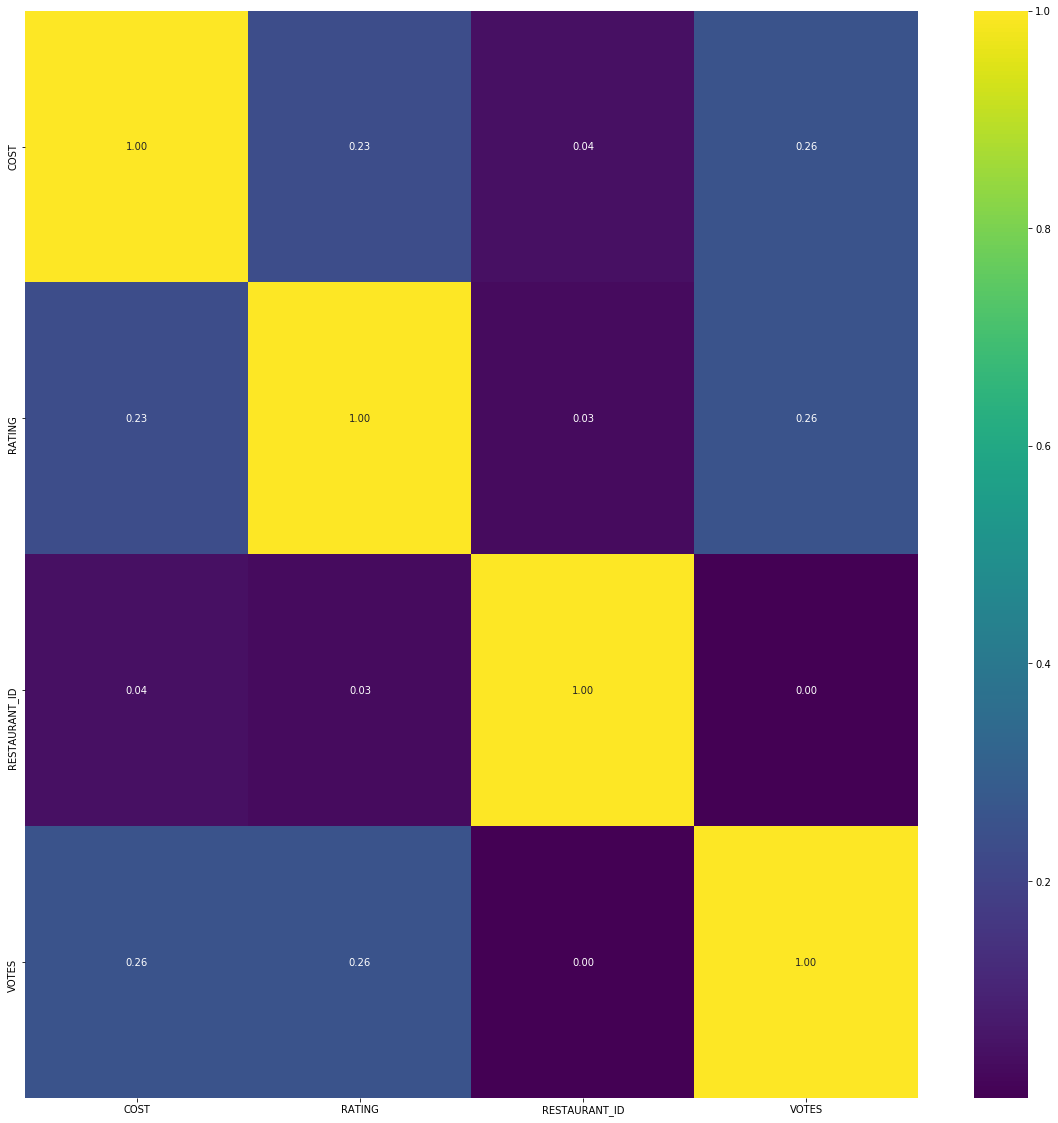

In [39]:
corr = Train_Data[Train_Data.columns].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='viridis')

We see that there is correlation between Cost and other variables. We will be working with all of them in our model.

Encoding the Categorical Variables

As there may be different categorical values in train and test data, we need to label encode all the values in order to work on the test data.

In [40]:
le_titles = LabelEncoder()
le_cuisines = LabelEncoder()

le_city = LabelEncoder()

le_locality = LabelEncoder()


le_titles.fit(all_titles)
le_cuisines.fit(all_cuisines)

le_city.fit(all_cities)
le_locality.fit(all_localities)

LabelEncoder()

In [41]:
Train_Data['TITLE1'] = le_titles.transform(Train_Data['TITLE1'])
Train_Data['TITLE2'] = le_titles.transform(Train_Data['TITLE2'])


Train_Data['CUISINE1'] = le_cuisines.transform(Train_Data['CUISINE1'])
Train_Data['CUISINE2'] = le_cuisines.transform(Train_Data['CUISINE2'])
Train_Data['CUISINE3'] = le_cuisines.transform(Train_Data['CUISINE3'])
Train_Data['CUISINE4'] = le_cuisines.transform(Train_Data['CUISINE4'])
Train_Data['CUISINE5'] = le_cuisines.transform(Train_Data['CUISINE5'])
Train_Data['CUISINE6'] = le_cuisines.transform(Train_Data['CUISINE6'])
Train_Data['CUISINE7'] = le_cuisines.transform(Train_Data['CUISINE7'])
Train_Data['CUISINE8'] = le_cuisines.transform(Train_Data['CUISINE8'])


Train_Data['CITY'] = le_city.transform(Train_Data['CITY'])
Train_Data['LOCALITY'] = le_locality.transform(Train_Data['LOCALITY'])


In [42]:
Test_Data['TITLE1'] = le_titles.transform(Test_Data['TITLE1'])
Test_Data['TITLE2'] = le_titles.transform(Test_Data['TITLE2'])


Test_Data['CUISINE1'] = le_cuisines.transform(Test_Data['CUISINE1'])
Test_Data['CUISINE2'] = le_cuisines.transform(Test_Data['CUISINE2'])
Test_Data['CUISINE3'] = le_cuisines.transform(Test_Data['CUISINE3'])
Test_Data['CUISINE4'] = le_cuisines.transform(Test_Data['CUISINE4'])
Test_Data['CUISINE5'] = le_cuisines.transform(Test_Data['CUISINE5'])
Test_Data['CUISINE6'] = le_cuisines.transform(Test_Data['CUISINE6'])
Test_Data['CUISINE7'] = le_cuisines.transform(Test_Data['CUISINE7'])
Test_Data['CUISINE8'] = le_cuisines.transform(Test_Data['CUISINE8'])


Test_Data['CITY'] = le_city.transform(Test_Data['CITY'])
Test_Data['LOCALITY'] = le_locality.transform(Test_Data['LOCALITY'])


In [49]:
# Classifying Independent and Dependent Features
#_______________________________________________

# Dependent Variable
Y_train = Train_Data.iloc[:, -1].values  

# Independent Variables
X_train = Train_Data.iloc[:,0 : -1].values

# Independent Variables for Test Set
X_test = Test_Data.iloc[:,:].values
Y_test=[]


Now lets use Random Forest

In [45]:
m = RandomForestClassifier(n_jobs=2,random_state=1)
m.fit(X_train,Y_train)
m.score(X_train,Y_train)

0.9970055161544523

Decision Tree Classifier

In [52]:
dt = DecisionTreeClassifier(random_state = 0 , max_depth = 5)
dt.fit(X_train , Y_train)
dt.score(X_train , Y_train)

0.11063829787234042

As we can see the Random Forest has an accuracy of 99.70 which is pretty good for the model. In order to avoid overfitting or underfitting we will be hypertuning our model using Grid searchCV.

In [51]:
m.predict(X_test)

array([ 24.,   9.,   9., ..., 366.,  22., 366.])

In [46]:
estimator = RandomForestRegressor()
param_grid = { "n_estimators" :[50,100,200] ,
               "max_features" : ["auto", "sqrt", "log2"] ,
               "bootstrap": [True, False] ,
               "min_samples_split" : [2,4,8]
             }
clf = GridSearchCV(estimator, param_grid, cv=5)
clf.fit(X_train,Y_train)
print(f"best parameters: {clf.best_params_}")
print(f"best score: {clf.score(X_train,Y_train)}")

best parameters: {'bootstrap': True, 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 200}
best score: 0.8004477584311238


In [53]:
#Saving the best model for future use

from sklearn.externals import joblib
joblib.dump(clf,'Restaurat Prediction.obj')

['Restaurat Prediction.obj']